Os dados podem ser baixados em https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset?resource=download 

## Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

## Leitura dos dados e visualização do conteúdo

In [2]:
#carrega os dados no dataframe
df = pd.read_csv('movie_metadata.csv')

In [3]:
#lista as colunas do dataframe
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
#visualiza as primeiras 5 entradas do dataframe (se quiser ver mais é só colocar um valor dentro dos parênteses)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
#imprime o número de linhas e colunas do dataframe
df.shape

(5043, 28)

In [6]:
#imprime o tipo de dado em cada coluna: object - variáveis categóricas, float64 e int64 - variáveis numéricas
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [8]:
# criando categorias para separar colunas numéricas e categóricas: facilita a AED
numericas_cols = [col for col in df.columns if df[col].dtype != 'object']
categoricas_cols = [col for col in df.columns if df[col].dtype == 'object']

numericas_cols, categoricas_cols

## Análise Exploratória

In [9]:
#resumo das variáveis numéricas
df[numericas_cols].describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [10]:
#resumo das variáveis categóricas
df[categoricas_cols].describe()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Ben-Hur,John Heard,based on novel,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


In [11]:
#descartando a coluna com o link do IMDB do filme
df.drop('movie_imdb_link', axis=1, inplace=True)

In [12]:
#verificando quais os valores da coluna 'color'
df['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [13]:
#descartando a coluna 'color'
df.drop('color', axis=1, inplace=True)

In [14]:
#verificando se existem valores faltantes nos dados
df.isna().any()

#resultado: algumas colunas apresentam dados categóricos

director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [15]:
#verificando quantos valores faltantes existem nos dados (discriminado por coluna)
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [16]:
#descartando as linhas que tem poucos valores faltantes
df.dropna(axis=0, subset=['director_name', 'num_critic_for_reviews',
                               'duration','director_facebook_likes','actor_3_facebook_likes',
                               'actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name',
                               'facenumber_in_poster','num_user_for_reviews','language','country',
                               'actor_2_facebook_likes','plot_keywords', 'title_year'],inplace=True)

In [17]:
#verificando quantas linhas de dados ainda estão no dataframe
df.shape

#Perdemos apenas 6% dos dados

(4737, 26)

In [18]:
#verificando quais os valores na coluna 'content rating' (classificação indicativa)
df['content_rating'].value_counts()

R            2082
PG-13        1436
PG            681
G             109
Not Rated     100
Unrated        58
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-14           3
TV-G            3
TV-PG           1
Name: content_rating, dtype: int64

In [19]:
#substituindo os valores faltantes por 'Not Rated'
df['content_rating'].fillna('Not Rated', inplace=True)

In [20]:
#verificando quais os valores na coluna 'aspect ratio' (proporção de tela)
df['aspect_ratio'].value_counts()

2.35     2311
1.85     1884
1.37       97
1.78       80
1.66       63
1.33       34
2.20       15
2.39       14
16.00       8
2.00        4
2.76        3
2.40        3
1.75        3
1.50        2
2.55        2
1.77        1
1.18        1
2.24        1
1.44        1
1.20        1
Name: aspect_ratio, dtype: int64

In [21]:
#substituindo os valores faltantes pela mediana dos valores 
df['aspect_ratio'].fillna(df['aspect_ratio'].median(), inplace=True)

## cuidado ao substituir pela mediana, pois pode-se criar valores que não fazem sentido pro seu problema

In [23]:
#verificando quais os valores na coluna 'gross' (ganho bruto do filme)

df['gross'].value_counts()

177343675.0    3
8000000.0      3
5773519.0      3
34964818.0     3
218051260.0    3
              ..
52277485.0     1
55802754.0     1
55291815.0     1
83299761.0     1
85222.0        1
Name: gross, Length: 3972, dtype: int64

In [24]:
#substituindo os valores faltantes pela mediana dos valores
df['gross'].fillna(df['gross'].median(), inplace=True)

In [25]:
#contagem de valores por categoria de 'budget'
df['budget'].value_counts()

20000000.0    172
30000000.0    141
25000000.0    140
15000000.0    140
40000000.0    130
             ... 
10818775.0      1
13800000.0      1
12305523.0      1
12600000.0      1
1100.0          1
Name: budget, Length: 424, dtype: int64

In [26]:
#substituindo os valores faltantes pela mediana dos valores
df['budget'].fillna(df['budget'].median(), inplace=True)

In [27]:
#verificando se removemos (ou substituimos) todos os valores faltantes
df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [31]:
#verificando se temos valores duplicados
df.duplicated().sum()

0

In [29]:
#removendo as duplicatas
df.drop_duplicates(inplace=True)

In [32]:
#nº de linhas e colunas após mudanças
df.shape

(4695, 26)

In [33]:
#verificando quais os valores da coluna 'language'
df['language'].value_counts()

English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Cantonese       10
Italian         10
Portuguese       8
Korean           8
Danish           5
Hebrew           4
Persian          4
Norwegian        4
Swedish          4
Dutch            4
Thai             3
Arabic           3
Dari             2
Aboriginal       2
Indonesian       2
None             2
Zulu             2
Czech            1
Romanian         1
Vietnamese       1
Dzongkha         1
Polish           1
Maya             1
Filipino         1
Icelandic        1
Kazakh           1
Hungarian        1
Bosnian          1
Telugu           1
Aramaic          1
Mongolian        1
Greek            1
Name: language, dtype: int64

In [34]:
#descartando a coluna 'language'
df.drop('language', axis=1, inplace=True)

In [ ]:
#verificando os valores na coluna 'country'
df['country'].value_counts()

In [35]:
#descartando a coluna 'country'
df.drop('country', axis=1, inplace=True)

In [36]:
#criando uma nova coluna na tabela de Lucro: diferença entre orçamento e receita de um filme
df['Profit'] = df['budget'].sub(df['gross'], axis=0)

In [37]:
#verificando se a coluna foi criada corretamente
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,goddess|marriage ceremony|marriage proposal|pi...,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,bomb|espionage|sequel|spy|terrorist,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,deception|imprisonment|lawlessness|police offi...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,alien|american civil war|male nipple|mars|prin...,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0


In [38]:
#salvando os dados do dataframe em um arquivo csv
df.to_csv('dados_imdb_analiseexpl.csv', index=False)

## Visualização dos dados

In [44]:
#criando gráfico de correlaciona lucro e nota do IMDB
ggplot(aes(x='imdb_score', y='Profit'), data=df) +\
    geom_line() +\
    stat_smooth(colour='blue', span=1)

TypeError: __init__() got multiple values for argument 'data'

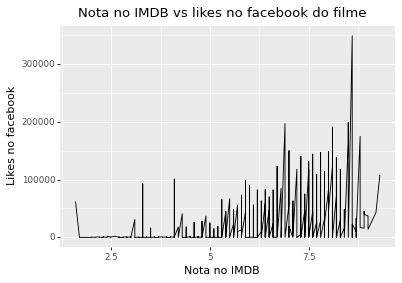

<ggplot: (8729141094382)>

In [40]:
#criando gráfico de correlaciona likes no facebook do filme e nota do IMDB

(ggplot(df)+\
    aes(x='imdb_score', y='movie_facebook_likes') +\
    geom_line() +\
    labs(title='Nota no IMDB vs likes no facebook do filme', x='Nota no IMDB', y='Likes no facebook')
)

/home/luani.piva/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


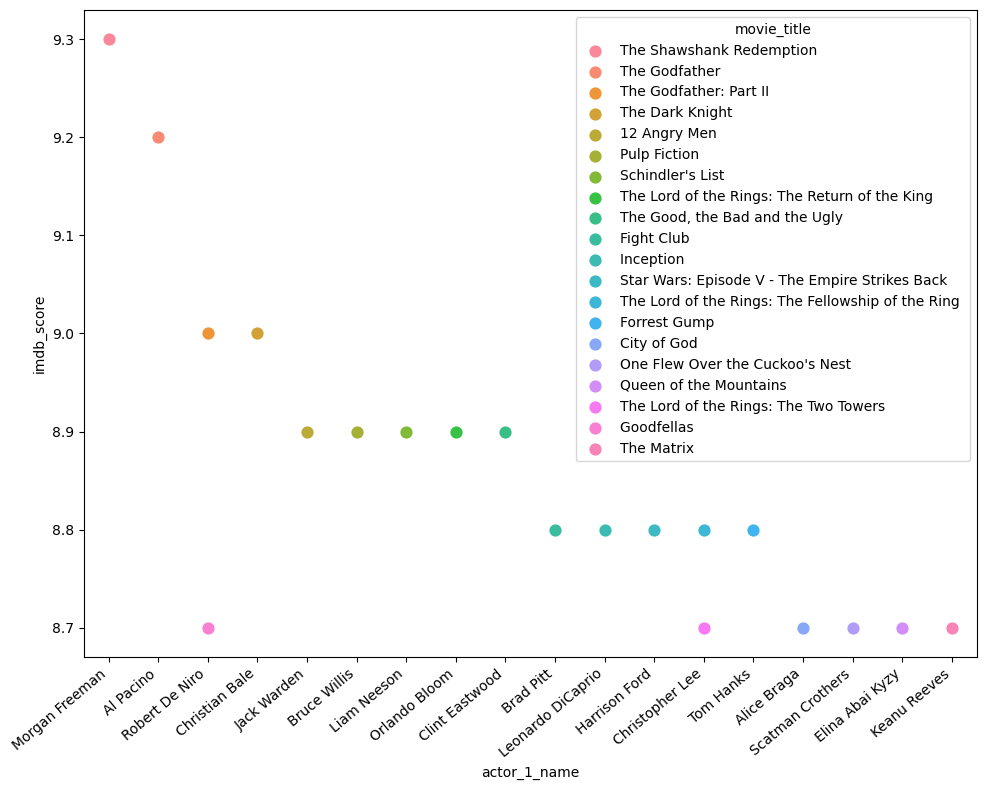

In [45]:
#gráfico dos 20 filmes com melhor nota com relação aos atores principais
plt.figure(figsize=(10,8))

df= df.sort_values(by ='imdb_score' , ascending=False)
df2=df.head(20)
ax=sns.pointplot(df2['actor_1_name'], df2['imdb_score'], hue=df2['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

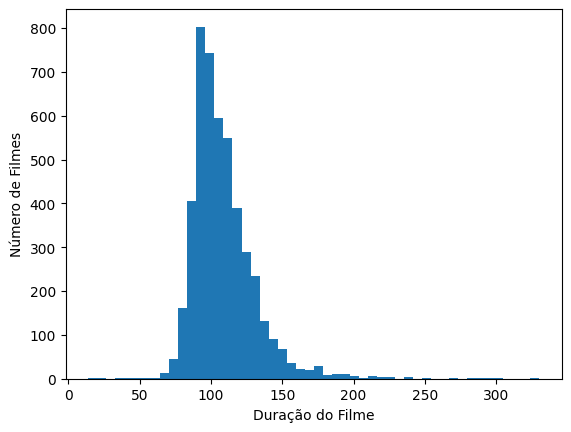

In [46]:
#gráfico que relaciona a quantidade de filmes por duração: mais filmes que duram entre 90-100 min
n, bins, patches = plt.hist(df['duration'], bins=50)
plt.xlabel('Duração do Filme')
plt.ylabel('Número de Filmes')
plt.show()

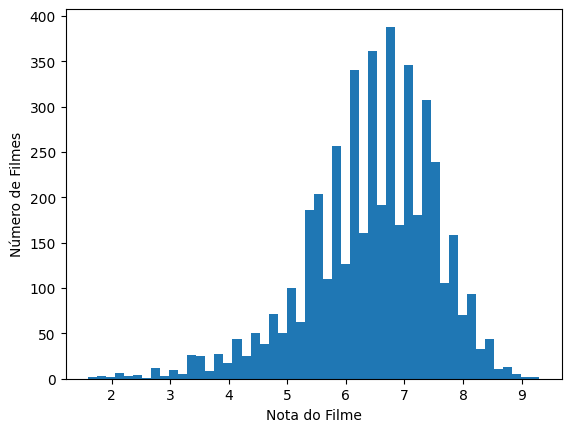

In [47]:
#gráfico que relaciona a quantidade de filmes por nota: mais filmes com notas entre 6 e 7
n, bins, patches = plt.hist(df['imdb_score'], bins=50)
plt.xlabel('Nota do Filme')
plt.ylabel('Número de Filmes')
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x7f0691867ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0691803970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f06918031f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0691803f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f069180f220>],
 'means': []}

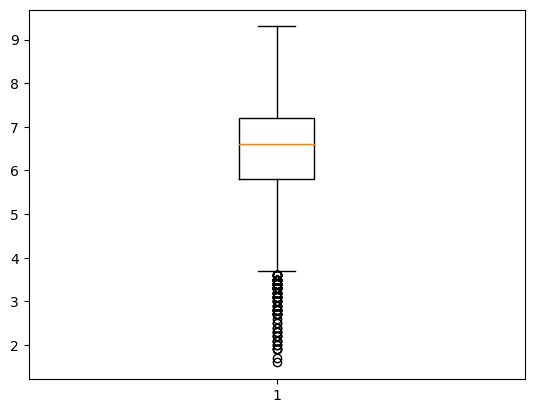

In [48]:
#outra forma de verificar a distribuição dos dados de score: gráfico boxplot
plt.boxplot(df['imdb_score'])

## Preparação dos dados

In [49]:
#retirando algumas colunas com dados categóricos
df.drop(columns=['director_name', 'actor_1_name', 'actor_2_name', 
                 'actor_3_name', 'plot_keywords', 'movie_title'], axis=1, inplace=True)

In [50]:
#verificando os valores da coluna 'genre'
df['genres'].value_counts()

Drama                                       209
Comedy                                      186
Comedy|Drama|Romance                        182
Comedy|Drama                                180
Comedy|Romance                              149
                                           ... 
Biography|Crime|Drama|Mystery|Thriller        1
Comedy|Drama|Music|Musical|Romance            1
Biography|Comedy|Musical|Romance|Western      1
Crime|Drama|Fantasy|Romance                   1
Action|Animation|Comedy|Family|Fantasy        1
Name: genres, Length: 875, dtype: int64

In [51]:
#retirando a coluna 'genres'
df.drop('genres', axis=1, inplace=True)

In [52]:
#retirando a coluna criada
df.drop(columns=['Profit'], axis=1, inplace=True)

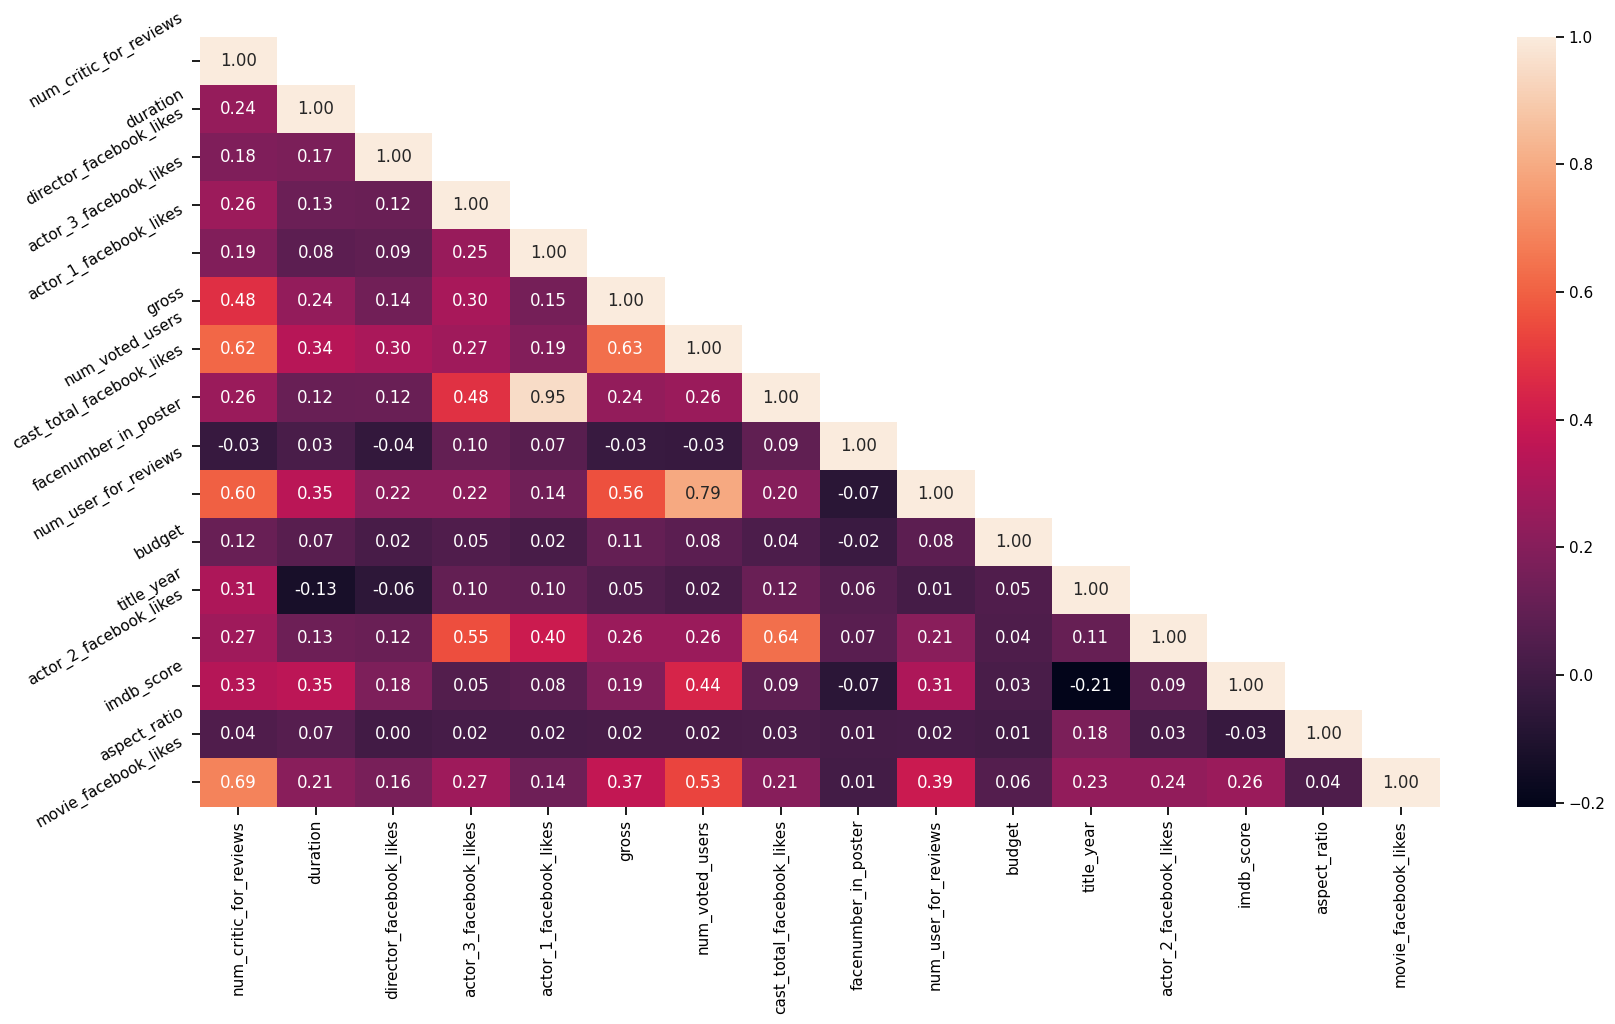

In [53]:
#verificando se existem colunas fortemente correlacionadas
import numpy as np
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.0})
plt.figure(figsize=(20,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [54]:
#criando uma nova coluna combinando as duas colunas muito correlacionadas
df['Other_actors_facebook_likes'] = df['actor_2_facebook_likes'] + df['actor_3_facebook_likes']

In [55]:
#removendo as colunas
df.drop(columns=['actor_2_facebook_likes', 'actor_3_facebook_likes',
                 'cast_total_facebook_likes'], axis=1, inplace=True)

In [56]:
#criando uma nova coluna combinando as duas colunas muito correlacionadas

df['critic_review_ratio'] = df['num_critic_for_reviews']/df['num_user_for_reviews']

In [57]:
#removendo as colunas
df.drop(columns=['num_critic_for_reviews', 'num_user_for_reviews'], axis=1, inplace=True)

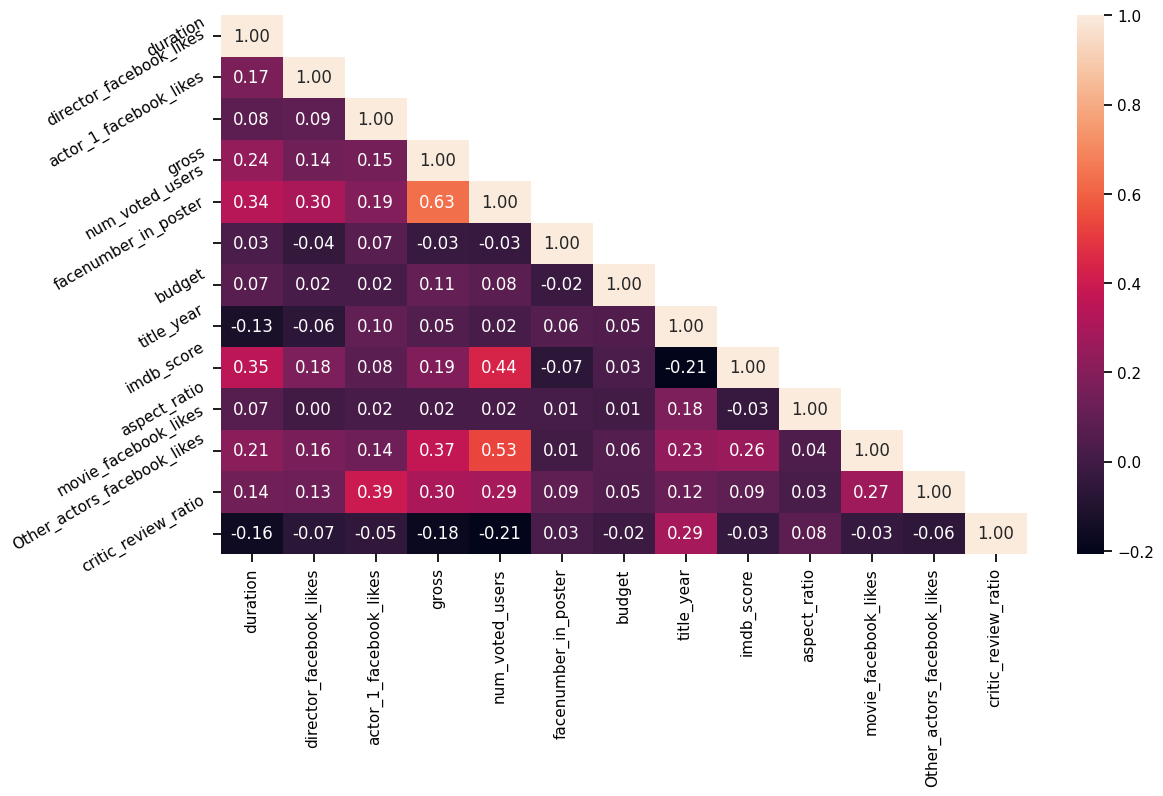

In [58]:
#verificando se ainda existem colunas fortemente correlacionadas

corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [59]:
#categorizando os valores de nota do imdb
df['imdb_binned_score']=pd.cut(df['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1

In [60]:
#contagem de filmes por notas
df['imdb_score'].value_counts()

6.7    211
6.6    191
6.5    181
6.4    180
7.2    180
      ... 
1.7      1
9.3      1
2.6      1
9.2      1
1.6      1
Name: imdb_score, Length: 76, dtype: int64

In [61]:
#contagem da coluna criada
df['imdb_binned_score'].value_counts()

3    3015
2    1323
4     203
1     154
Name: imdb_binned_score, dtype: int64

In [62]:
df.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,Other_actors_facebook_likes,critic_review_ratio,imdb_binned_score
1937,142.0,0.0,11000.0,28341469.0,1689764,0.0,R,25000000.0,1994.0,9.3,1.85,108000,1206.0,0.048021,4
3466,175.0,0.0,14000.0,134821952.0,1155770,1.0,R,6000000.0,1972.0,9.2,1.85,43000,13000.0,0.092940,4
2837,220.0,0.0,22000.0,57300000.0,790926,1.0,R,13000000.0,1974.0,9.0,1.85,14000,17000.0,0.229231,4
66,152.0,22000.0,23000.0,533316061.0,1676169,0.0,PG-13,185000000.0,2008.0,9.0,2.35,37000,24000.0,0.138204,4
4822,96.0,0.0,359.0,26005908.0,447785,1.0,Not Rated,350000.0,1957.0,8.9,1.66,40000,512.0,0.199324,4


In [63]:
#criando novas colunas para transformar os valores categóricos de 'content rating' (classificação indicativa)
#em valores numéricos
df = pd.get_dummies(data = df, columns=['content_rating'], prefix=['content_rating'], drop_first=True)

In [64]:
df.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,title_year,imdb_score,aspect_ratio,...,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-PG,content_rating_Unrated,content_rating_X
1937,142.0,0.0,11000.0,28341469.0,1689764,0.0,25000000.0,1994.0,9.3,1.85,...,0,0,0,0,1,0,0,0,0,0
3466,175.0,0.0,14000.0,134821952.0,1155770,1.0,6000000.0,1972.0,9.2,1.85,...,0,0,0,0,1,0,0,0,0,0
2837,220.0,0.0,22000.0,57300000.0,790926,1.0,13000000.0,1974.0,9.0,1.85,...,0,0,0,0,1,0,0,0,0,0
66,152.0,22000.0,23000.0,533316061.0,1676169,0.0,185000000.0,2008.0,9.0,2.35,...,0,0,1,0,0,0,0,0,0,0
4822,96.0,0.0,359.0,26005908.0,447785,1.0,350000.0,1957.0,8.9,1.66,...,1,0,0,0,0,0,0,0,0,0


In [65]:
df.to_csv('dados_imdb_com_nota.csv', index=False)

In [66]:
#escolhendo as colunas do dataframe que serão nossos valores de entrada para o modelo
X=pd.DataFrame(columns=['duration','director_facebook_likes','actor_1_facebook_likes','gross',
                        'num_voted_users','facenumber_in_poster','budget','title_year','aspect_ratio',
                        'movie_facebook_likes','Other_actors_facebook_likes','critic_review_ratio',
                        'content_rating_G','content_rating_GP',
                        'content_rating_M','content_rating_NC-17','content_rating_Not Rated',
                        'content_rating_PG','content_rating_PG-13','content_rating_Passed',
                        'content_rating_R','content_rating_TV-14','content_rating_TV-G',
                        'content_rating_TV-PG','content_rating_Unrated','content_rating_X'],data=df)

In [67]:
#escolhendo a(s) coluna(s) do dataframe que serão a resposta do modelo
y = pd.DataFrame(columns=['imdb_binned_score'], data=df)

#### Fim do código

---